# Visualisation des clusters – Réduction de dimension

## Objectif
Projeter les documents vectorisés (TF-IDF) dans un espace 2D
afin de visualiser les clusters obtenus par K-Means.


# Cellule 2 — Import des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cellule 3 — Chargement des données nettoyées

In [3]:
df = pd.read_csv("data/bbc-text-cleaned.csv")
texts = df["clean_text"]

# Cellule 4 — Vectorisation TF-IDF (mêmes paramètres)

In [4]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 2),
    stop_words="english"
)

X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Cellule 5 — Clustering K-Means (K = 5)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_tfidf)

# Cellule 6 — Réduction de dimension avec PCA

In [6]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Cellule 7 — Création du DataFrame 2D

In [8]:
df_pca = pd.DataFrame({
    "x": X_pca[:, 0],
    "y": X_pca[:, 1],
    "cluster": df["cluster"],
    "category": df["category"]
})

df_pca.head(10)

,x,y,cluster,category
0,-0.038516,0.161595,4,tech
1,-0.012611,0.030607,1,business
2,-0.046370,-0.073766,3,sport
3,-0.084170,-0.120757,3,sport
4,-0.084753,-0.047292,0,entertainment
5,0.339356,-0.146763,2,politics
6,0.277100,-0.101071,2,politics
7,-0.072848,-0.076285,3,sport
8,-0.103631,-0.127686,3,sport
9,-0.070167,-0.072123,0,entertainment


# Cellule 8 — Visualisation des clusters (2D)

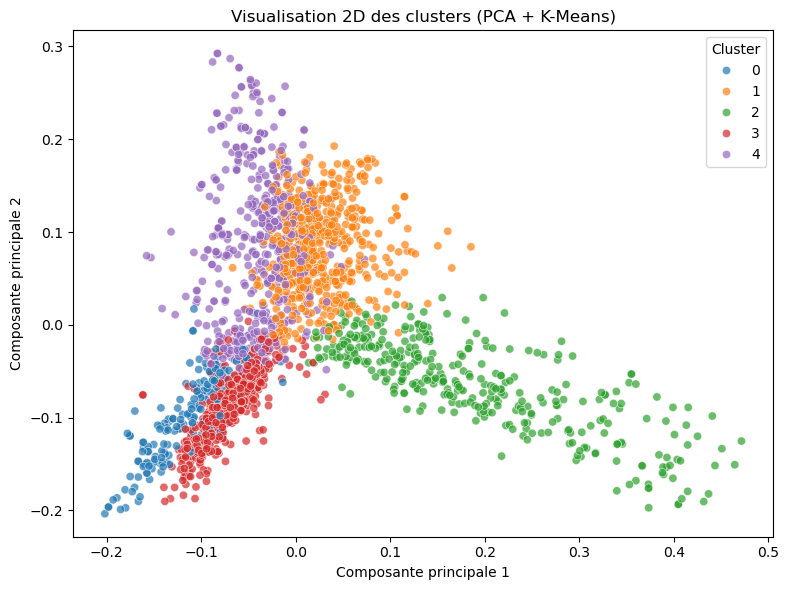

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x="x",
    y="y",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)

plt.title("Visualisation 2D des clusters (PCA + K-Means)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Cellule 9 — Comparaison visuelle avec les thèmes réels

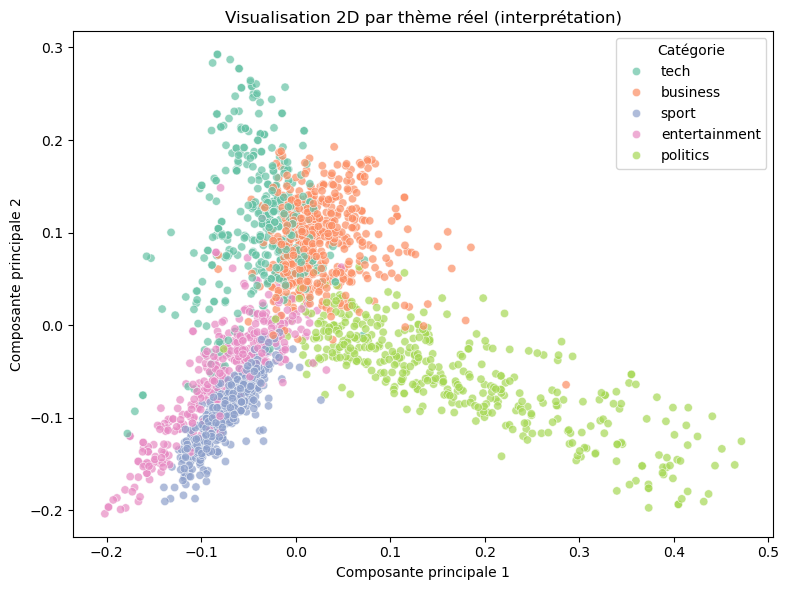

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x="x",
    y="y",
    hue="category",
    palette="Set2",
    alpha=0.7
)

plt.title("Visualisation 2D par thème réel (interprétation)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Catégorie")
plt.tight_layout()
plt.show()

# Cellule 10 — Variance expliquée par PCA

In [11]:
pca.explained_variance_ratio_

array([0.01172215, 0.00983908])

## Conclusion de la visualisation

- La réduction de dimension a permis de visualiser les clusters en 2D.
- Les groupes obtenus par K-Means sont globalement cohérents.
- Les thèmes réels confirment la pertinence du clustering.
